In [1]:
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.tsa.api as sm
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

import statsmodels.tsa.api as sm

from statsmodels.tsa.statespace.sarimax import SARIMAX

In [2]:
df = pd.read_csv("db2023_cleandf.csv")

In [3]:
df.head()

,Comment,Time,Score
0,Posting a bit early so people know where to go...,2023-10-10 11:14:12,1
1,20% fare reduction on public transport continu...,2023-10-10 13:55:05,39
2,This is good.,2023-10-10 14:16:50,3
3,"Aaaaaahhhhh, what have the Greens done for us!",2023-10-10 16:56:05,2
4,"€67 million to provide 16,000 craft apprentice...",2023-10-10 14:18:04,25


In [4]:
df.tail()

,Comment,Time,Score
474,[deleted],2023-10-10 13:30:20,-1
475,You did not,2023-10-10 13:31:29,3
476,Whats the 18 year old minimum wage rate going to?,2023-10-10 15:30:22,1
477,10.16 I'd say,2023-10-10 15:33:48,1
478,Yeah forgot its a set rate of 80% of minimum w...,2023-10-10 15:52:32,1


In [5]:
df["Time"]

0      2023-10-10 11:14:12
1      2023-10-10 13:55:05
2      2023-10-10 14:16:50
3      2023-10-10 16:56:05
4      2023-10-10 14:18:04
              ...         
474    2023-10-10 13:30:20
475    2023-10-10 13:31:29
476    2023-10-10 15:30:22
477    2023-10-10 15:33:48
478    2023-10-10 15:52:32
Name: Time, Length: 479, dtype: object

In [6]:
df["Time"] = df["Time"].astype("datetime64[ns]")

In [7]:
df["Time"]

0     2023-10-10 11:14:12
1     2023-10-10 13:55:05
2     2023-10-10 14:16:50
3     2023-10-10 16:56:05
4     2023-10-10 14:18:04
              ...        
474   2023-10-10 13:30:20
475   2023-10-10 13:31:29
476   2023-10-10 15:30:22
477   2023-10-10 15:33:48
478   2023-10-10 15:52:32
Name: Time, Length: 479, dtype: datetime64[ns]

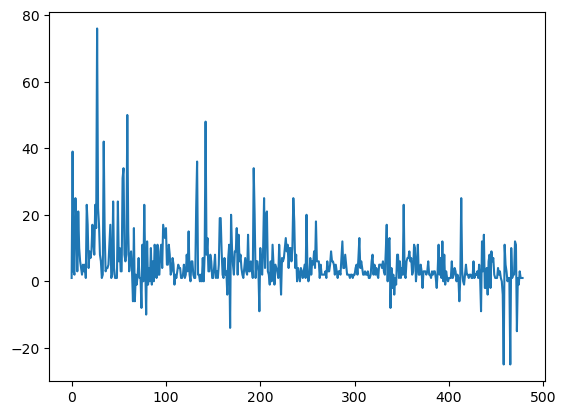

In [8]:
df["Score"].plot();

In [9]:
adfuller(df["Score"])

(-4.477154194045056,
 0.00021620009732447327,
 11,
 467,
 {'1%': -3.4444305322234365,
  '5%': -2.8677488864580885,
  '10%': -2.5700770984781443},
 3200.46646536486)

##### Our P score for the Augmented Dickey Fuller test above is   0.00021620009732447327

Here, the p-value is much smaller than 0.05, indicating that we can reject the null hypothesis of the ADF test. The null hypothesis of the ADF test is that the time series is non-stationary. Since we are rejecting the null hypothesis, the evidence suggests that the time series is stationary. As this time series is stationary we will use the ARMA model for our analysis.

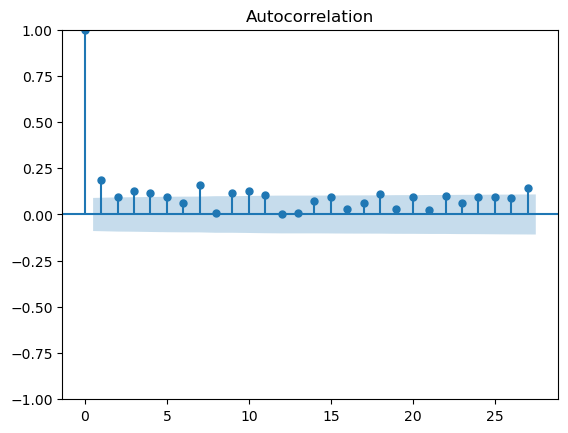

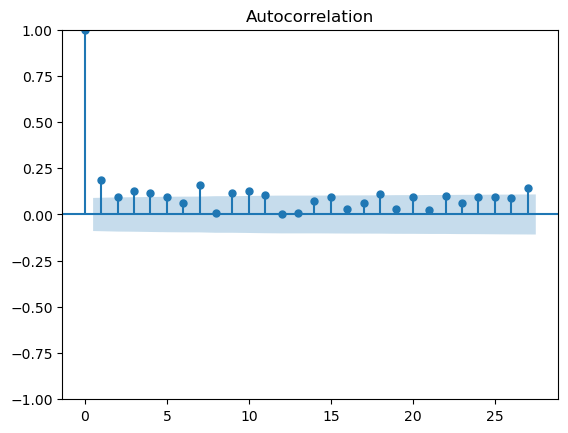

In [11]:
plot_acf(df["Score"])

In [12]:
# Partial Autocorrelation

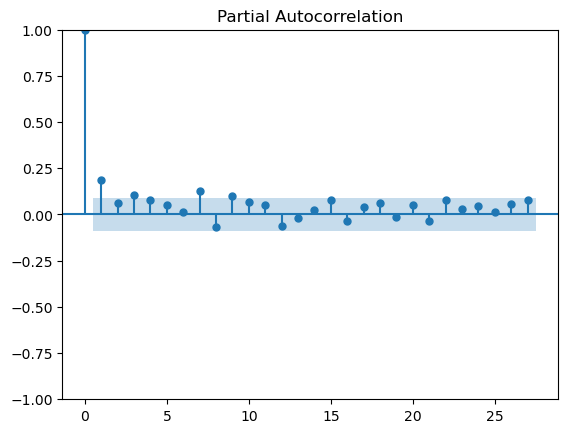

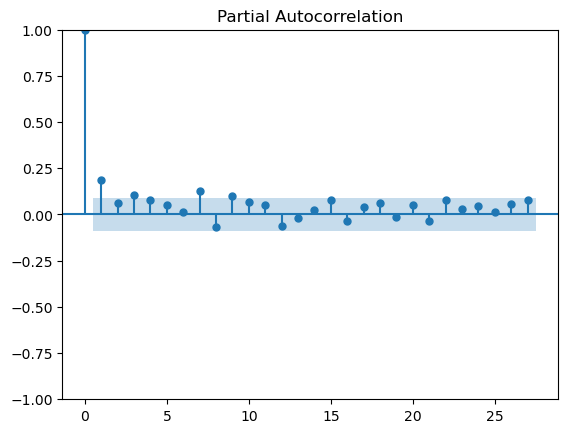

In [13]:
plot_pacf(df["Score"], method='ywm')

In [ ]:
ACF - Exponential decay => no MA (q=0)

PACF - Signigicant value at lag 1 ie p=1

In [ ]:
# AIC Values

In [15]:
aicVals = []
for p in range(5):
    for q in range(5):
        aicVals.append( [   sm.ARIMA( df["Score"], order=(p, 0, q) ).fit().aic, p, q   ] )

C:\Users\aad.sray\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\aad.sray\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\aad.sray\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\aad.sray\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-inve

In [16]:
aicVals

[[3383.2951687764394, 0, 0],
 [3370.5376420364173, 0, 1],
 [3370.9375173101816, 0, 2],
 [3368.5668201668705, 0, 3],
 [3368.017098004179, 0, 4],
 [3368.7143265681716, 1, 0],
 [3350.126983577823, 1, 1],
 [3348.4671837724236, 1, 2],
 [3350.41114040721, 1, 3],
 [3351.867902826086, 1, 4],
 [3368.7436553587568, 2, 0],
 [3348.558644639363, 2, 1],
 [3347.5907522336142, 2, 2],
 [3349.057510765276, 2, 3],
 [3350.6247783620065, 2, 4],
 [3365.348800217611, 3, 0],
 [3350.4787462144377, 3, 1],
 [3349.0122509770226, 3, 2],
 [3347.0963219967316, 3, 3],
 [3345.7007759687767, 3, 4],
 [3364.514060070338, 4, 0],
 [3351.8316055192527, 4, 1],
 [3350.564590962179, 4, 2],
 [3350.0181251098074, 4, 3],
 [3351.693467952835, 4, 4]]

In [17]:
aicVals.sort()

In [18]:
aicVals

[[3345.7007759687767, 3, 4],
 [3347.0963219967316, 3, 3],
 [3347.5907522336142, 2, 2],
 [3348.4671837724236, 1, 2],
 [3348.558644639363, 2, 1],
 [3349.0122509770226, 3, 2],
 [3349.057510765276, 2, 3],
 [3350.0181251098074, 4, 3],
 [3350.126983577823, 1, 1],
 [3350.41114040721, 1, 3],
 [3350.4787462144377, 3, 1],
 [3350.564590962179, 4, 2],
 [3350.6247783620065, 2, 4],
 [3351.693467952835, 4, 4],
 [3351.8316055192527, 4, 1],
 [3351.867902826086, 1, 4],
 [3364.514060070338, 4, 0],
 [3365.348800217611, 3, 0],
 [3368.017098004179, 0, 4],
 [3368.5668201668705, 0, 3],
 [3368.7143265681716, 1, 0],
 [3368.7436553587568, 2, 0],
 [3370.5376420364173, 0, 1],
 [3370.9375173101816, 0, 2],
 [3383.2951687764394, 0, 0]]

In [ ]:
[3345.7007759687767, 3, 4],
 [3347.0963219967316, 3, 3],
 [3347.5907522336142, 2, 2],
 [3348.4671837724236, 1, 2],
 [3348.558644639363, 2, 1],

In [ ]:
# Test Model 1 - (3, 0, 4)  [3345.7007759687767, 3, 4]

# *THIS IS THE BEST MODE AS IT WAS NUMBER 1 ON 25 AND NUMBER 2 ON 100 SEARCHES

In [81]:
model = sm.ARIMA(df["Score"], order=(3, 0 , 4)).fit()

C:\Users\aad.sray\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [83]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Score   No. Observations:                  479
Model:                 ARIMA(3, 0, 4)   Log Likelihood               -1663.850
Date:                Wed, 22 Nov 2023   AIC                           3345.701
Time:                        22:17:25   BIC                           3383.246
Sample:                             0   HQIC                          3360.460
                                - 479                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.7559      3.106      1.853      0.064      -0.332      11.844
ar.L1         -0.8841      0.041    -21.651      0.000      -0.964      -0.804
ar.L2          0.9354      0.014     67.019      0.000       0.908       0.963
ar.L3          0.9365      0.037     25.354      0.000       0.864       1.009
ma.L1          1.0284      0.058     17.595      0.000       0.914       1.143
ma.L2         -0.7978      0.058    -13.837      0.000      -0.911      -0.685
ma.L3         -0.9977      0.056    -17.805      0.000      -1.108      -0.888
ma.L4         -0.0923      0.048     -1.925      0.054      -0.186       0.002
sigma2        60.6894      2.054     29.543      0.000      56.663      64.716
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              4331.60
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.29   Skew:                             2.36
Prob(H) (two-sided):                  0.00   Kurtosis:                        16.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [84]:
pred_time = 20
result = model.predict(pred_time)

In [85]:
result

20      8.038697
21      9.835452
22      7.445678
23     11.534555
24      7.757310
         ...    
474     0.628145
475     2.628231
476     1.112053
477     2.311542
478     1.450932
Name: predicted_mean, Length: 459, dtype: float64

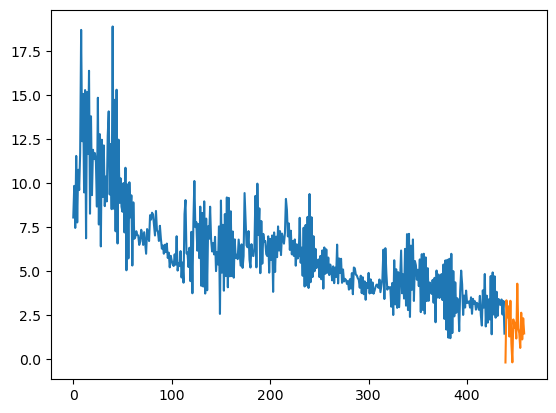

In [86]:
plt.plot(range(len(result)-pred_time), result[:-pred_time])
plt.plot(range(len(result)-pred_time, len(result)), result[-pred_time:])

In [ ]:
# Model 2 - (3, 0, 3) -  [3347.0963219967316, 3, 3]



In [87]:
model2 = sm.ARIMA(df["Score"], order=(3, 0 , 3)).fit()

C:\Users\aad.sray\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [88]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Score   No. Observations:                  479
Model:                 ARIMA(3, 0, 3)   Log Likelihood               -1665.548
Date:                Wed, 22 Nov 2023   AIC                           3347.096
Time:                        22:18:50   BIC                           3380.470
Sample:                             0   HQIC                          3360.216
                                - 479                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.8992      2.933      2.012      0.044       0.151      11.647
ar.L1         -0.8763      0.039    -22.520      0.000      -0.953      -0.800
ar.L2          0.9400      0.014     64.890      0.000       0.912       0.968
ar.L3          0.9219      0.037     25.098      0.000       0.850       0.994
ma.L1          0.9486      0.047     20.124      0.000       0.856       1.041
ma.L2         -0.8831      0.038    -23.391      0.000      -0.957      -0.809
ma.L3         -0.9107      0.041    -22.084      0.000      -0.992      -0.830
sigma2        61.0994      1.956     31.233      0.000      57.265      64.934
===================================================================================
Ljung-Box (L1) (Q):                   2.34   Jarque-Bera (JB):              4427.99
Prob(Q):                              0.13   Prob(JB):                         0.00
Heteroskedasticity (H):               0.28   Skew:                             2.37
Prob(H) (two-sided):                  0.00   Kurtosis:                        17.12
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [89]:
pred_time = 20
result2 = model2.predict(pred_time)

In [90]:
result2

20      7.890540
21     10.221936
22      7.558478
23     10.930049
24      7.776737
         ...    
474     0.846262
475     2.195586
476     1.377994
477     1.719843
478     1.833287
Name: predicted_mean, Length: 459, dtype: float64

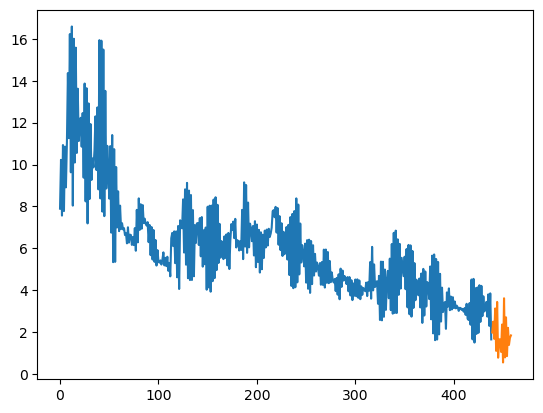

In [91]:
plt.plot(range(len(result2)-pred_time), result2[:-pred_time])
plt.plot(range(len(result2)-pred_time, len(result2)), result2[-pred_time:])

In [ ]:
# Model 3 - (2, 0, 2) -  [3347.5907522336142, 2, 2],

In [92]:
model3 = sm.ARIMA(df["Score"], order=(2, 0 , 2)).fit()

In [93]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Score   No. Observations:                  479
Model:                 ARIMA(2, 0, 2)   Log Likelihood               -1667.795
Date:                Wed, 22 Nov 2023   AIC                           3347.591
Time:                        22:19:49   BIC                           3372.621
Sample:                             0   HQIC                          3357.430
                                - 479                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.8921      2.969      1.985      0.047       0.073      11.711
ar.L1          0.1868      0.110      1.702      0.089      -0.028       0.402
ar.L2          0.8068      0.109      7.382      0.000       0.593       1.021
ma.L1         -0.0824      0.086     -0.954      0.340      -0.252       0.087
ma.L2         -0.8475      0.085     -9.930      0.000      -1.015      -0.680
sigma2        61.7573      1.846     33.457      0.000      58.139      65.375
===================================================================================
Ljung-Box (L1) (Q):                   0.28   Jarque-Bera (JB):              4842.07
Prob(Q):                              0.60   Prob(JB):                         0.00
Heteroskedasticity (H):               0.29   Skew:                             2.45
Prob(H) (two-sided):                  0.00   Kurtosis:                        17.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [94]:
pred_time = 20
result3 = model3.predict(pred_time)

In [95]:
result3

20     9.071116
21     8.699403
22     9.077661
23     9.651702
24     9.182400
         ...   
474    2.196278
475    1.109275
476    2.344440
477    1.153130
478    2.183306
Name: predicted_mean, Length: 459, dtype: float64

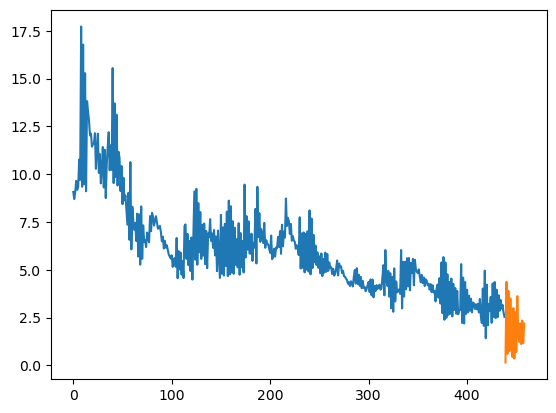

In [96]:
plt.plot(range(len(result3)-pred_time), result3[:-pred_time])
plt.plot(range(len(result3)-pred_time, len(result3)), result3[-pred_time:])

In [ ]:
# Model 4 - (1, 0, 2) -  [3348.4671837724236, 1, 2]

In [97]:
model4 = sm.ARIMA(df["Score"], order=(1, 0 , 2)).fit()

In [98]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Score   No. Observations:                  479
Model:                 ARIMA(1, 0, 2)   Log Likelihood               -1669.234
Date:                Wed, 22 Nov 2023   AIC                           3348.467
Time:                        22:21:03   BIC                           3369.326
Sample:                             0   HQIC                          3356.667
                                - 479                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.9018      3.038      1.942      0.052      -0.053      11.857
ar.L1          0.9968      0.005    194.334      0.000       0.987       1.007
ma.L1         -0.8749      0.047    -18.600      0.000      -0.967      -0.783
ma.L2         -0.0888      0.044     -2.001      0.045      -0.176      -0.002
sigma2        62.1352      1.957     31.746      0.000      58.299      65.971
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              4637.83
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               0.29   Skew:                             2.41
Prob(H) (two-sided):                  0.00   Kurtosis:                        17.46
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [99]:
pred_time = 20
result4 = model4.predict(pred_time)

In [100]:
result4

20     9.011428
21     8.680024
22     8.890258
23     9.933154
24     9.482429
         ...   
474    1.948914
475    1.533264
476    1.987739
477    1.749511
478    1.758982
Name: predicted_mean, Length: 459, dtype: float64

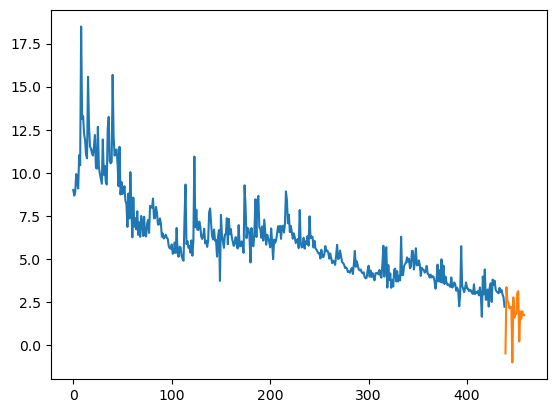

In [101]:
plt.plot(range(len(result4)-pred_time), result4[:-pred_time])
plt.plot(range(len(result4)-pred_time, len(result4)), result4[-pred_time:])

In [ ]:
# Model 5 - (2, 0, 1) -    [3348.558644639363, 2, 1],

In [102]:
model5 = sm.ARIMA(df["Score"], order=(2, 0 , 1)).fit()

C:\Users\aad.sray\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\aad.sray\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [103]:
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Score   No. Observations:                  479
Model:                 ARIMA(2, 0, 1)   Log Likelihood               -1669.279
Date:                Wed, 22 Nov 2023   AIC                           3348.559
Time:                        22:22:22   BIC                           3369.417
Sample:                             0   HQIC                          3356.758
                                - 479                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.9094      3.052      1.936      0.053      -0.073      11.892
ar.L1          1.0866      0.046     23.683      0.000       0.997       1.177
ar.L2         -0.0894      0.045     -1.989      0.047      -0.178      -0.001
ma.L1         -0.9672      0.018    -54.256      0.000      -1.002      -0.932
sigma2        62.1535      1.987     31.273      0.000      58.258      66.049
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              4612.76
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.29   Skew:                             2.41
Prob(H) (two-sided):                  0.00   Kurtosis:                        17.42
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [104]:
pred_time = 20
result5 = model5.predict(pred_time)

In [105]:
result5

20     8.965423
21     8.692649
22     8.876606
23     9.919940
24     9.545709
         ...   
474    1.809297
475    1.557825
476    1.971199
477    1.774405
478    1.762940
Name: predicted_mean, Length: 459, dtype: float64

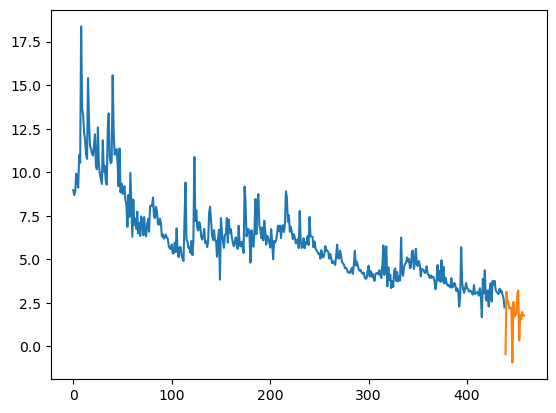

In [106]:
plt.plot(range(len(result5)-pred_time), result5[:-pred_time])
plt.plot(range(len(result5)-pred_time, len(result5)), result5[-pred_time:])

In [ ]:
# Here we have decided to increase our ranges to see if we can gather any better results for our ARMA testing

In [44]:
aicVals = []
for p in range(10):
    for q in range(10):
        aicVals.append( [   sm.ARIMA( df["Score"], order=(p, 0, q) ).fit().aic, p, q   ] )

C:\Users\aad.sray\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\aad.sray\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\aad.sray\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\aad.sray\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Use

In [45]:
aicVals.sort()

In [46]:
aicVals

[[3345.1821835020637, 6, 6],
 [3345.7007759687767, 3, 4],
 [3346.043188816975, 7, 5],
 [3346.0493070901252, 6, 5],
 [3346.464820924101, 5, 8],
 [3346.699891389827, 5, 6],
 [3347.0963219967316, 3, 3],
 [3347.1157026827877, 5, 7],
 [3347.5396469533507, 6, 7],
 [3347.547941352418, 4, 9],
 [3347.5907522336142, 2, 2],
 [3347.761264146475, 5, 3],
 [3347.844560628829, 3, 5],
 [3348.265206953377, 6, 8],
 [3348.423685200962, 4, 8],
 [3348.4671837724236, 1, 2],
 [3348.558644639363, 2, 1],
 [3348.7908182225106, 8, 9],
 [3348.970973209339, 9, 4],
 [3349.0122509770226, 3, 2],
 [3349.057510765276, 2, 3],
 [3349.50772439521, 3, 6],
 [3349.5888561468914, 8, 7],
 [3349.7015990106265, 8, 6],
 [3349.785561548885, 7, 7],
 [3350.0181251098074, 4, 3],
 [3350.126983577823, 1, 1],
 [3350.307134171953, 7, 6],
 [3350.355107828729, 3, 7],
 [3350.358461894353, 5, 9],
 [3350.4060420785004, 8, 5],
 [3350.41114040721, 1, 3],
 [3350.4787462144377, 3, 1],
 [3350.564590962179, 4, 2],
 [3350.6247783620065, 2, 4],
 [3350

In [ ]:
# Model 6 - (0, 0, 0) -  [3383.2951687764394, 0, 0]

In [107]:
model6 = sm.ARIMA(df["Score"], order=(0, 0 , 0)).fit()

In [108]:
model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Score   No. Observations:                  479
Model:                          ARIMA   Log Likelihood               -1689.648
Date:                Wed, 22 Nov 2023   AIC                           3383.295
Time:                        22:26:00   BIC                           3391.639
Sample:                             0   HQIC                          3386.575
                                - 479                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.5386      0.480     11.541      0.000       4.598       6.479
sigma2        67.8312      1.863     36.412      0.000      64.180      71.482
===================================================================================
Ljung-Box (L1) (Q):                  16.41   Jarque-Bera (JB):              5668.32
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.31   Skew:                             2.63
Prob(H) (two-sided):                  0.00   Kurtosis:                        19.01
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [109]:
pred_time = 20
result6 = model6.predict(pred_time)

In [110]:
result6

20     5.538617
21     5.538617
22     5.538617
23     5.538617
24     5.538617
         ...   
474    5.538617
475    5.538617
476    5.538617
477    5.538617
478    5.538617
Name: predicted_mean, Length: 459, dtype: float64

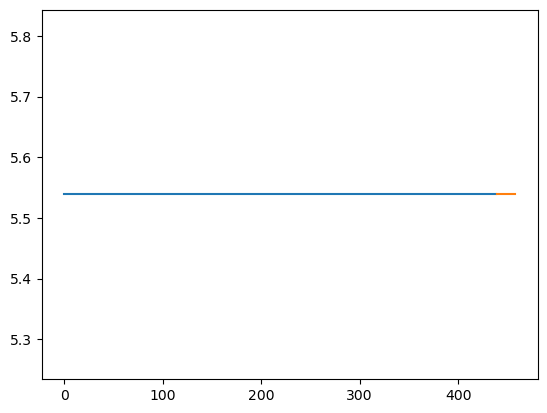

In [111]:
plt.plot(range(len(result6)-pred_time), result6[:-pred_time])
plt.plot(range(len(result6)-pred_time, len(result6)), result6[-pred_time:])

In [ ]:
# Model 7 - (6, 0, 6) -  [3345.1821835020637, 6, 6]

In [61]:
model7 = sm.ARIMA(df["Score"], order=(6, 0 , 6)).fit()

C:\Users\aad.sray\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [62]:
model7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Score   No. Observations:                  479
Model:                 ARIMA(6, 0, 6)   Log Likelihood               -1658.591
Date:                Wed, 22 Nov 2023   AIC                           3345.182
Time:                        21:42:23   BIC                           3403.586
Sample:                             0   HQIC                          3368.141
                                - 479                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.5832     11.733      0.476      0.634     -17.413      28.580
ar.L1         -1.1785      0.140     -8.447      0.000      -1.452      -0.905
ar.L2         -0.7001      0.097     -7.253      0.000      -0.889      -0.511
ar.L3          0.2034      0.059      3.443      0.001       0.088       0.319
ar.L4          0.8790      0.065     13.536      0.000       0.752       1.006
ar.L5          1.2213      0.094     13.044      0.000       1.038       1.405
ar.L6          0.5701      0.136      4.207      0.000       0.304       0.836
ma.L1          1.3152      0.115     11.432      0.000       1.090       1.541
ma.L2          0.8978      0.086     10.485      0.000       0.730       1.066
ma.L3         -0.0082      0.076     -0.108      0.914      -0.157       0.141
ma.L4         -0.8343      0.061    -13.598      0.000      -0.955      -0.714
ma.L5         -1.3047      0.080    -16.308      0.000      -1.461      -1.148
ma.L6         -0.7409      0.110     -6.706      0.000      -0.957      -0.524
sigma2        58.8526      2.221     26.504      0.000      54.500      63.205
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              4174.01
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.28   Skew:                             2.30
Prob(H) (two-sided):                  0.00   Kurtosis:                        16.71
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [63]:
pred_time = 20
result7 = model7.predict(pred_time)

In [64]:
result7

20      7.839521
21      9.336184
22      8.267058
23     13.208957
24     10.085583
         ...    
474     0.897371
475     0.424742
476     2.223261
477     1.705134
478     3.820701
Name: predicted_mean, Length: 459, dtype: float64

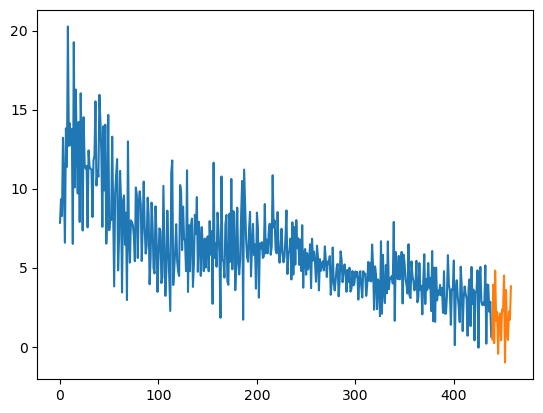

In [65]:
plt.plot(range(len(result7)-pred_time), result7[:-pred_time])
plt.plot(range(len(result7)-pred_time, len(result7)), result7[-pred_time:])

In [ ]:
# Model 8 - (7, 0, 5) - [3346.043188816975, 7, 5]

In [66]:
model8 = sm.ARIMA(df["Score"], order=(7, 0 , 5)).fit()

C:\Users\aad.sray\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [67]:
model8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Score   No. Observations:                  479
Model:                 ARIMA(7, 0, 5)   Log Likelihood               -1659.022
Date:                Wed, 22 Nov 2023   AIC                           3346.043
Time:                        21:55:42   BIC                           3404.447
Sample:                             0   HQIC                          3369.002
                                - 479                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.5672      6.779      0.821      0.411      -7.718      18.853
ar.L1         -0.7361      0.092     -7.993      0.000      -0.917      -0.556
ar.L2          0.0268      0.059      0.453      0.651      -0.089       0.143
ar.L3          0.0866      0.054      1.604      0.109      -0.019       0.192
ar.L4          0.8755      0.039     22.491      0.000       0.799       0.952
ar.L5          0.7476      0.081      9.237      0.000       0.589       0.906
ar.L6         -0.0637      0.060     -1.070      0.285      -0.180       0.053
ar.L7          0.0551      0.056      0.982      0.326      -0.055       0.165
ma.L1          0.8726      0.079     11.001      0.000       0.717       1.028
ma.L2          0.1013      0.049      2.063      0.039       0.005       0.197
ma.L3          0.0036      0.047      0.077      0.938      -0.089       0.096
ma.L4         -0.8802      0.042    -21.023      0.000      -0.962      -0.798
ma.L5         -0.8567      0.073    -11.784      0.000      -0.999      -0.714
sigma2        58.7103      2.225     26.388      0.000      54.350      63.071
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              3671.74
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               0.28   Skew:                             2.21
Prob(H) (two-sided):                  0.00   Kurtosis:                        15.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [68]:
pred_time = 20
result8 = model8.predict(pred_time)

In [69]:
result8

20      8.320664
21      8.420037
22      8.313872
23     13.830847
24      7.899296
         ...    
474     0.782128
475     1.483180
476     0.280307
477     3.989422
478     1.233684
Name: predicted_mean, Length: 459, dtype: float64

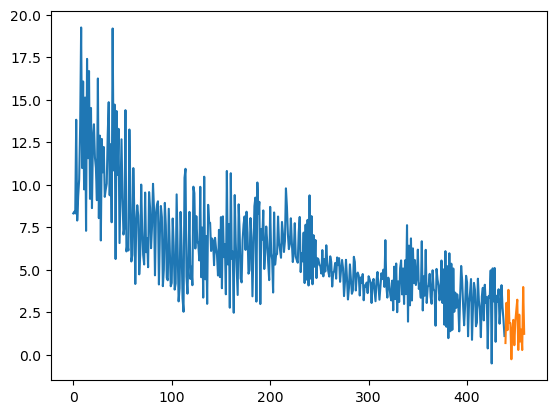

In [70]:
plt.plot(range(len(result8)-pred_time), result8[:-pred_time])
plt.plot(range(len(result8)-pred_time, len(result8)), result8[-pred_time:])

In [ ]:
# Model 9 - (6, 0, 5) -  [3346.0493070901252, 6, 5],

In [71]:
model9 = sm.ARIMA(df["Score"], order=(6, 0 , 5)).fit()

C:\Users\aad.sray\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [72]:
model9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Score   No. Observations:                  479
Model:                 ARIMA(6, 0, 5)   Log Likelihood               -1660.025
Date:                Wed, 22 Nov 2023   AIC                           3346.049
Time:                        21:56:16   BIC                           3400.281
Sample:                             0   HQIC                          3367.369
                                - 479                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.5735      7.010      0.795      0.427      -8.165      19.312
ar.L1         -0.9740      0.104     -9.364      0.000      -1.178      -0.770
ar.L2         -0.1202      0.071     -1.691      0.091      -0.259       0.019
ar.L3          0.4047      0.043      9.444      0.000       0.321       0.489
ar.L4          1.1224      0.051     22.039      0.000       1.023       1.222
ar.L5          0.6974      0.102      6.869      0.000       0.498       0.896
ar.L6         -0.1381      0.053     -2.606      0.009      -0.242      -0.034
ma.L1          1.1205      0.096     11.704      0.000       0.933       1.308
ma.L2          0.2982      0.060      4.963      0.000       0.180       0.416
ma.L3         -0.2564      0.053     -4.798      0.000      -0.361      -0.152
ma.L4         -1.0942      0.048    -22.663      0.000      -1.189      -1.000
ma.L5         -0.8287      0.081    -10.214      0.000      -0.988      -0.670
sigma2        59.6215      1.974     30.206      0.000      55.753      63.490
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              4117.42
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               0.30   Skew:                             2.29
Prob(H) (two-sided):                  0.00   Kurtosis:                        16.61
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [73]:
pred_time = 20
result9 = model9.predict(pred_time)

In [74]:
result9

20      7.665258
21      8.091871
22      9.106831
23     13.584381
24      6.902359
         ...    
474     0.190702
475     0.443898
476     0.926311
477     4.639083
478     0.491881
Name: predicted_mean, Length: 459, dtype: float64

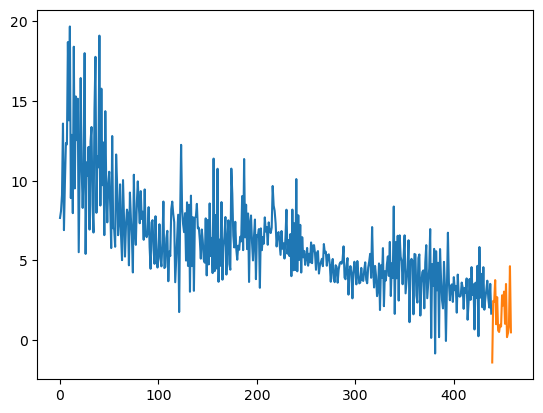

In [75]:
plt.plot(range(len(result9)-pred_time), result9[:-pred_time])
plt.plot(range(len(result9)-pred_time, len(result9)), result9[-pred_time:])

In [ ]:
# Model 10 - (5, 0, 8) -  [3346.464820924101, 5, 8],

In [76]:
model10 = sm.ARIMA(df["Score"], order=(5, 0 , 8)).fit()

C:\Users\aad.sray\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [77]:
model10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Score   No. Observations:                  479
Model:                 ARIMA(5, 0, 8)   Log Likelihood               -1658.232
Date:                Wed, 22 Nov 2023   AIC                           3346.465
Time:                        21:56:35   BIC                           3409.040
Sample:                             0   HQIC                          3371.064
                                - 479                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.5930      6.088      0.919      0.358      -6.340      17.526
ar.L1         -0.3209      0.191     -1.682      0.093      -0.695       0.053
ar.L2         -0.2468      0.089     -2.772      0.006      -0.421      -0.072
ar.L3          0.3444      0.086      3.994      0.000       0.175       0.513
ar.L4          0.6396      0.089      7.218      0.000       0.466       0.813
ar.L5          0.5777      0.183      3.161      0.002       0.220       0.936
ma.L1          0.4652      0.192      2.425      0.015       0.089       0.841
ma.L2          0.3261      0.116      2.800      0.005       0.098       0.554
ma.L3         -0.2303      0.083     -2.761      0.006      -0.394      -0.067
ma.L4         -0.6235      0.100     -6.259      0.000      -0.819      -0.428
ma.L5         -0.6174      0.198     -3.125      0.002      -1.005      -0.230
ma.L6         -0.1010      0.065     -1.550      0.121      -0.229       0.027
ma.L7          0.0748      0.052      1.438      0.150      -0.027       0.177
ma.L8         -0.1271      0.067     -1.909      0.056      -0.258       0.003
sigma2        60.3179      2.523     23.911      0.000      55.374      65.262
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):              4134.39
Prob(Q):                              0.86   Prob(JB):                         0.00
Heteroskedasticity (H):               0.28   Skew:                             2.33
Prob(H) (two-sided):                  0.00   Kurtosis:                        16.61
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [78]:
pred_time = 20
result10 = model10.predict(pred_time)

In [79]:
result10

20      8.738647
21      8.466011
22      8.181121
23     13.098539
24      8.710113
         ...    
474     1.622639
475     0.572421
476     1.208714
477     2.391829
478     3.426050
Name: predicted_mean, Length: 459, dtype: float64

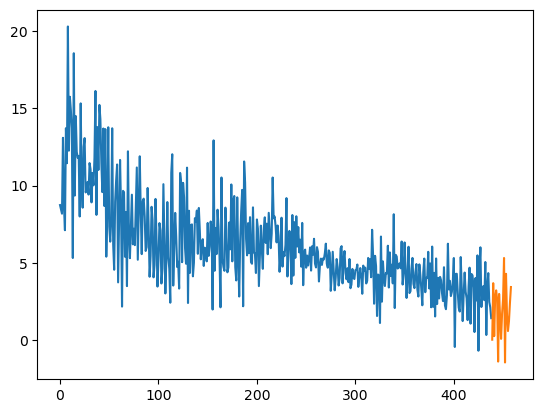

In [80]:
plt.plot(range(len(result10)-pred_time), result10[:-pred_time])
plt.plot(range(len(result10)-pred_time, len(result10)), result10[-pred_time:])

In [ ]:
# Top 5 AIC results from 25 model searches (5x0x5)

[3345.7007759687767, 3, 4],
 [3347.0963219967316, 3, 3],
 [3347.5907522336142, 2, 2],
 [3348.4671837724236, 1, 2],
 [3348.558644639363, 2, 1],

In [ ]:
# Top 5 AIC results from 100 model searches (10x0x10)


 [3345.1821835020637, 6, 6],
 [3345.7007759687767, 3, 4],
 [3346.043188816975, 7, 5],
 [3346.0493070901252, 6, 5],
 [3346.464820924101, 5, 8],
    
    
# As we can see that our top and second best value for both searches was -
# [3345.7007759687767, 3, 4]